In [1]:
# ZumiDashBoard
# jupyter dashboard for Zümi Robots

## Task
#Build a live dashboard wich runs on zumi:
#* showing all sensor data
#* live cam
#* remote driving


In [2]:
import param
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import panel as pn
from zumi.zumi import Zumi
import cv2
import IPython.display
import PIL.Image
import time
from zumi.util.screen import Screen
from zumi.util.camera import Camera
pn.extension()
%matplotlib inline

ModuleNotFoundError: No module named 'zumi'

In [47]:
zumi = Zumi()

Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
OLED Screen detected
Gyroscope & Accelerometer detected


In [48]:
# Aufgabe 1: remote driving 
fahren = pn.widgets.Button(name='\u25B2', width=100)
links = pn.widgets.Button(name='\u25c0', width=100)
rechts = pn.widgets.Button(name='\u25b6', width=100)
rückwärts = pn.widgets.Button(name='\u25BC', width=100)


def links_func(event):
    zumi.turn_left()
def rechts_func(event):
    zumi.turn_right()
def fahren_func(event):
    zumi.forward()
def rückwärts_func(event):
    zumi.reverse()

    
links.on_click(links_func)

rechts.on_click(rechts_func)

fahren.on_click(fahren_func)

rückwärts.on_click(rückwärts_func)
space = "                    "
print(space+"Zumi Bewegungsrichtungen")
pn.Row(links,fahren,rückwärts,rechts)





                    Zumi Bewegungsrichtungen


Row
    [0] Button(name='◀', width=100)
    [1] Button(name='▲', width=100)
    [2] Button(name='▼', width=100)
    [3] Button(name='▶', width=100)

In [11]:
# Aufgabe 1.2 Lichter
lichtVorneAn = pn.widgets.Button(name='Licht vorne an', width=100)
lichtVorneAus = pn.widgets.Button(name='Licht vorne aus', width=100)
lichtHintenAn = pn.widgets.Button(name='Licht hinten an', width=100)
lichtHintenAus = pn.widgets.Button(name='Licht hinten aus', width=100)


def lichtVorneAn_func(event):
    zumi.headlights_on()
def lichtVorneAus_func(event):
    zumi.headlights_off()
def lichtHintenAn_func(event):
    zumi.hazard_lights_on()
def lichtHintenAus_func(event):
    zumi.hazard_lights_off()

    
lichtVorneAn.on_click(lichtVorneAn_func)

lichtVorneAus.on_click(lichtVorneAus_func)

lichtHintenAn.on_click(lichtHintenAn_func)

lichtHintenAus.on_click(lichtHintenAus_func)

space = "                    "
print(space+"Zumi Lichter")
pn.Row(lichtVorneAn, lichtVorneAus, lichtHintenAn, lichtHintenAus)


                    Zumi Lichter


Row
    [0] Button(name='Licht vorne an', width=100)
    [1] Button(name='Licht vorne aus', width=100)
    [2] Button(name='Licht hinten an', width=100)
    [3] Button(name='Licht hinten aus', width=100)

In [49]:
# Aufgabe 2: zeige alle Sensordaten von Zumi an
print("Sensordaten:")
FRONT_RIGHT = zumi.get_IR_data(0)
print("Front Right:",FRONT_RIGHT)

BOTTOM_RIGHT = zumi.get_IR_data(1)
print("Bottom Right:",BOTTOM_RIGHT)

BACK_RIGHT = zumi.get_IR_data(2)
print("Back Right:",BACK_RIGHT)

BOTTOM_LEFT = zumi.get_IR_data(3)
print("Bottom Left:",BOTTOM_LEFT)

BACK_LEFT = zumi.get_IR_data(4)
print("Back Left:",BACK_LEFT)

FRONT_LEFT = zumi.get_IR_data(5)
print("Front Left:",FRONT_LEFT)

BATTERY_VOLTAGE = zumi.get_battery_voltage()
print("Batterie Voltage:",BATTERY_VOLTAGE)
  
#print("Batterie Percentage:",zumi.get_battery_percentage())


Sensordaten:
Front Right: 135
Bottom Right: 77
Back Right: 120
Bottom Left: 49
Back Left: 48
Front Left: 163
Batterie Voltage: 3.6666666666666665


In [57]:
# Aufgabe 2.1 Sensordaten speichern
#sensor_data = ["FrontRight: "+str(FRONT_RIGHT),"BottomRight: "+str(BOTTOM_RIGHT),"BackRight: "+str(BACK_RIGHT),
#               "BottomLeft: "+str(BOTTOM_LEFT),"BackLeft: "+str(BACK_LEFT),"FrontLeft: "+str(FRONT_LEFT),
#               "BatteryVoltage: "+str(BATTERY_VOLTAGE)]
#print (sensor_data);
a = "llaaaa";
#sensor_data = ["leer"];
a = ["dada"];
Sensordaten_Speichern = pn.widgets.Button(name='Sensordaten speichern', width=200)
Sensordaten_Anzeigen = pn.widgets.Button(name='Sensordaten anzeigen', width=200)

def sensordaten_Speichern_func(event):
    #sensor_data = ["FrontRight: "+str(FRONT_RIGHT),"BottomRight: "+str(BOTTOM_RIGHT),"BackRight: "+str(BACK_RIGHT),
    #           "BottomLeft: "+str(BOTTOM_LEFT),"BackLeft: "+str(BACK_LEFT),"FrontLeft: "+str(FRONT_LEFT),
    #           "BatteryVoltage: "+str(BATTERY_VOLTAGE)]
    #print (sensor_data);
    mylist = ['x', 3, 'b']
def sensordaten_Anzeigen_func(event):
   #print (sensor_data);
   #return('[%s]' % ', '.join(map(str, mylist))) 
    a.list()
    
Sensordaten_Speichern.on_click(sensordaten_Speichern_func)

Sensordaten_Anzeigen.on_click(sensordaten_Anzeigen_func)


space = "                    "
print(space+"Sensordaten Zumi")
pn.Row(Sensordaten_Speichern,Sensordaten_Anzeigen)

#Button Sensordaten speichern

#Button gespeicherte Sensordaten anzeigen

                    Sensordaten Zumi


Row
    [0] Button(name='Sensordaten speichern', width=200)
    [1] Button(name='Sensordaten anzeigen', width=200)

In [53]:
mylist = ['x', 3, 'b']
print('[%s]' % ', '.join(map(str, mylist)))

[x, 3, b]


In [ ]:
# Aufgabe 2.1 Sensordaten speichern
sensor_data =[]
all_data = zumi.get_all_IR_data()
data = "Startdaten Zumi";
data += "<br>FRONT_RIGHT: "+str(all_data[0]);
data += "<br>\nBOTTOM_RIGHT: "+str(all_data[1]);
data += "<br>\nBACK_RIGHT: "+str(all_data[2]);
data += "<br>\nBOTTOM_LEFT: "+str(all_data[3]);
data += "<br>\nBACK_LEFT: "+str(all_data[4]);
data += "<br>\nFRONT_LEFT: "+str(all_data[5]);



# Plot Sensordaten
from bokeh.plotting import figure

p1 = figure(width=500, height=500, name='Sensor1')

p1.scatter(get_a0_data(),get_y_data(), color="red")

tabs = pn.Tabs(('Scatter', p1))

tabs

In [51]:
# Aufgabe 2.1 Sensordaten speichern

text = "<br>\n# Zumi Control\nBattery: "+str((zumi.get_battery_voltage()/4.0) *100)+"%"

a0_data =[]
a1_data =[]
a2_data =[]
a3_data =[]
a4_data =[]
a5_data =[]
y_data =[]

a = zumi.get_all_IR_data()
data = "Startdaten Zumi";
data += "<br>FRONT_RIGHT: "+str(a[0]);
data += "<br>\nBOTTOM_RIGHT: "+str(a[1]);
data += "<br>\nBACK_RIGHT: "+str(a[2]);
data += "<br>\nBOTTOM_LEFT: "+str(a[3]);
data += "<br>\nBACK_LEFT: "+str(a[4]);
data += "<br>\nFRONT_LEFT: "+str(a[5]);

a0_data.append(a[0])
a1_data.append(a[1])
a2_data.append(a[2])
a3_data.append(a[3])
a4_data.append(a[4])
a5_data.append(a[5])
y_data.append(len(a0_data))

textsensordata = pn.widgets.TextInput(value='SensorData')
turn_left_btn = pn.widgets.Button(name='\u25c0', width=50,margin=[0,0,0,20])
camerabtn = pn.widgets.Button(name='Cam', width=50,margin=[0,0])
turn_right_btn = pn.widgets.Button(name='\u25b6', width=50, margin=[0,0])
move_forward_btn = pn.widgets.Button(name='\u25b2', width=50,margin=[0,70])
move_back_btn = pn.widgets.Button(name='\u25bc', width=50,margin=[0,70])
checkdata = pn.widgets.Button(name='Sensordaten', width=80,button_type='primary')


def readsensordata(event):
    a = zumi.get_all_IR_data()
    sensordata = ""+str(a[0]);
    sensordata += ";"+str(a[1]);
    sensordata += ";"+str(a[2]);
    sensordata += ";"+str(a[3]);
    sensordata += ";"+str(a[4]);
    sensordata += ";"+str(a[5]);
    textsensordata.value = sensordata  
    a0_data.append(a[0])
    a1_data.append(a[1])
    a2_data.append(a[2])
    a3_data.append(a[3])
    a4_data.append(a[4])
    a5_data.append(a[5])
    y_data.append(len(a0_data))

def get_a0_data():
    return a0_data
def get_a1_data():
    return a1_data
def get_a2_data():
    return a2_data
def get_a3_data():
    return a3_data
def get_a4_data():
    return a4_data
def get_a5_data():
    return a5_data
def get_y_data():
    return y_data

def turn_left_func(event):
    zumi.turn_left()

def turn_right_func(event):
    zumi.turn_right()
    
def move_forward_func(event):
    zumi.forward()
    refreshdata
    
def move_back_func(event):
    zumi.reverse() 
    
def cameracap(event):
    camera=Camera()
    camera.start_camera()
    camera.save_photo("currentpicture") 
    camera.close()
        
def output():
    gspec = pn.GridSpec(width=800, height=600)
    gspec[0,   1:3] = col
    gspec[4,   5:6] = pn.pane.JPG('currentpicture.jpg')
    gspec
    
turn_left_btn.on_click(turn_left_func)
turn_right_btn.on_click(turn_right_func)
move_forward_btn.on_click(move_forward_func)
move_back_btn.on_click(move_back_func)
camerabtn.on_click(cameracap)
checkdata.on_click(readsensordata)
col = pn.Column(pn.Row(text),pn.Row(move_forward_btn),pn.Row(turn_left_btn,camerabtn,turn_right_btn),pn.Row(move_back_btn),pn.Row(data), pn.Row(checkdata, textsensordata))


In [52]:
# Plot Sensordaten
from bokeh.plotting import figure

p1 = figure(width=500, height=500, name='Sensor1')

p1.scatter(get_a0_data(),get_y_data(), color="red")




tabs = pn.Tabs(('Scatter', p1))

tabs

Tabs
    [0] Bokeh(Figure, name='Scatter')
    [1] Bokeh(Figure, name='Sensor2')
    [2] Bokeh(Figure, name='Sensor3')
    [3] Bokeh(Figure, name='Sensor4')
    [4] Bokeh(Figure, name='Sensor5')
    [5] Bokeh(Figure, name='Sensor6')

In [5]:
# Aufgabe 3: Liveübertragung von Zumi-Kamera
camera = Camera()
camera.start_camera()

try:
    for i in range(30):
        frame=camera.capture()
        print(np.shape(frame))
        IPython.display.display(PIL.Image.fromarray(frame))
        time.sleep(2)
        IPython.display.clear_output(wait=True)
finally:
    camera.close()

Closing PiCamera


In [6]:
# Kamerabild speichern
import time
import picamera

with picamera.PiCamera() as camera:
    camera.resolution = (1024, 768)
    camera.start_preview()
    camera.rotation = 180
    camera.capture('out.jpg')
   

JPG(str)
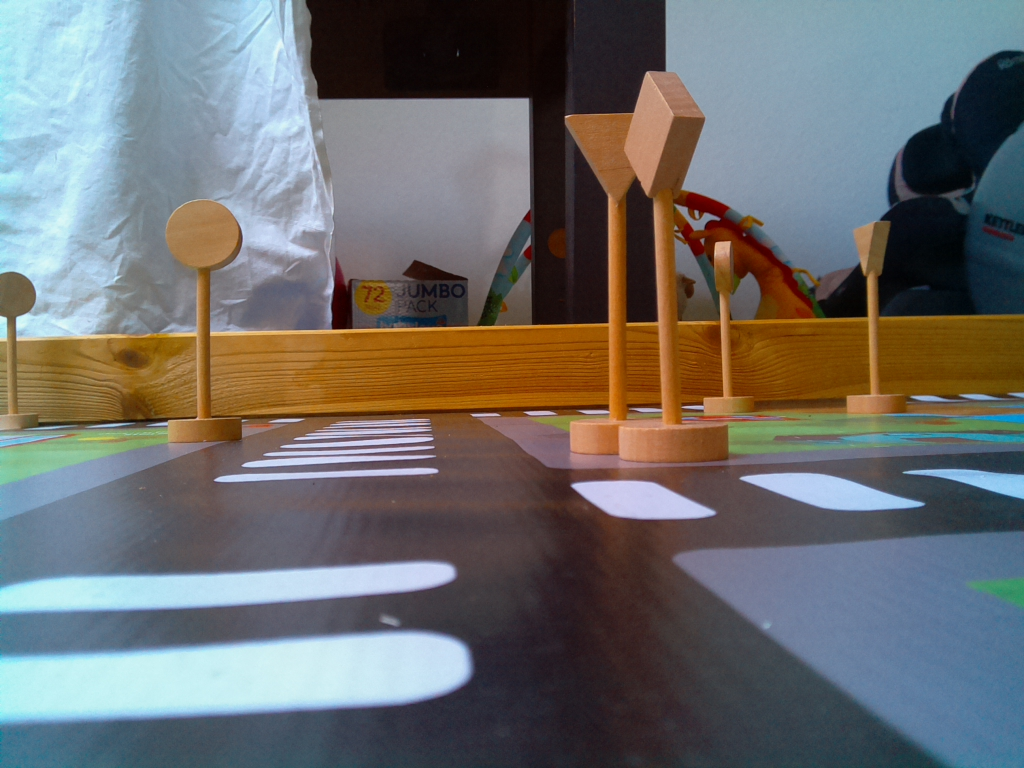

In [7]:
pn.pane.JPG('out.jpg')

In [ ]:
# Dashboard gesamt



#Kamerabild
pn.pane.JPG('out.jpg')

In [ ]:
#* live cam API
####Camera
#close()
#capture()
#save_photo()
#start_camera()
#is_closed()

In [ ]:
#* remote driving API
####Driving
#right_circle()
#hard_brake()
#parallel_park()
#circle()
#triangle()
#go_straight()
#right_u_turn()
#figure_8()
#rectangle()
#reverse()
#left_u_turn()
#square()
#square_left()
#turn_left()
#j_turn()
#left_circle()
#forward()
#turn_right()
#square_right()
#go_reverse()

In [ ]:
###Sensordaten API
#get_all_IR_data()
#get_battery_voltage()
#get_IR_data()